In [2]:
!pip install -r requirements.txt

     |████████████████████████████████| 11.1 MB 4.0 MB/s eta 0:00:01    |██████████████████████▍         | 7.8 MB 3.2 MB/s eta 0:00:02
     |████████████████████████████████| 4.0 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 123 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 139 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 256 kB 4.2 MB/s eta 0:00:01     |███████████████▎                | 122 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 15 kB/s  eta 0:00:01     |██████████                      | 10.9 MB 6.5 MB/s eta 0:00:04     |█████████████████▋              | 19.1 MB 2.2 MB/s eta 0:00:07     |███████████████████▋            | 21.2 MB 2.1 MB/s eta 0:00:07     |████████████████████            | 21.7 MB 2.1 MB/s eta 0:00:07
     |████████████████████████████████| 302 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 377 kB 4.5

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

csv_path = "/home/thiago/ia/A3/src/CAR_DETAILS_FROM_CAR_DEKHO.csv"

# Carregar o conjunto de dados
data = pd.read_csv(csv_path)
data = data.drop_duplicates()

# Exibir as primeiras linhas do conjunto de dados
data.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Tipo de data

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [64]:
data.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [65]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [66]:
for column in data.columns:
    print(data[column].unique())

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
[2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]
[  60000  135000  600000  250000  450000  140000  550000  240000  850000
  365000  260000 1650000  585000 1195000  390000 1964999 1425000  975000
 1190000  930000  525000 1735000 1375000  900000 1300000 1400000  229999
 1550000 1250000  625000 1050000  560000  290000  275000  411000  150000
  500000  100000  725000  401000  750000  310000  665000  465000  160000
  675000  300000   70000  151000  280000  350000  570000  125000  130000
  925000  200000  248000   80000  650000  495000  371000 1025000 8150000
  325000 1470000 2800000  210000 1150000 4500000 2750000 1975000  175000
 2500000  628000  399000  315000  780000  434000  690000  555000  120000
  165000   95000  80000

# Feature engineering - Separar marca do carro


In [70]:
#Splitting company name from CarName column

if "company" not in data.columns:
    company = data['name'].apply(lambda x : x.split(' ')[0])
    data.insert(3,"company",company)

# Loop para remover a marca da coluna 'name'
for index, row in data.iterrows():
    data.at[index, 'name'] = row['name'].replace(row['company'], '')

data.head()


,name,year,selling_price,company,km_driven,fuel,seller_type,transmission,owner
0,800 AC,2007,60000,Maruti,70000,Petrol,Individual,Manual,First Owner
1,Wagon R LXI Minor,2007,135000,Maruti,50000,Petrol,Individual,Manual,First Owner
2,Verna 1.6 SX,2012,600000,Hyundai,100000,Diesel,Individual,Manual,First Owner
3,RediGO T Option,2017,250000,Datsun,46000,Petrol,Individual,Manual,First Owner
4,Amaze VX i-DTEC,2014,450000,Honda,141000,Diesel,Individual,Manual,Second Owner


# Análise exploratória


Dados numéricos

-Distribuição de precos
    - boxpolot preco
- Distribuição de anos
    - boxpolot anos
- Distribuição de km rodados
    - boxpolot km rodado

Dados categóricos

- checar popularidade de marca
- popularidade de transmissão
- popularidade do tipo de combustível
- popularidade da quantidade de donos

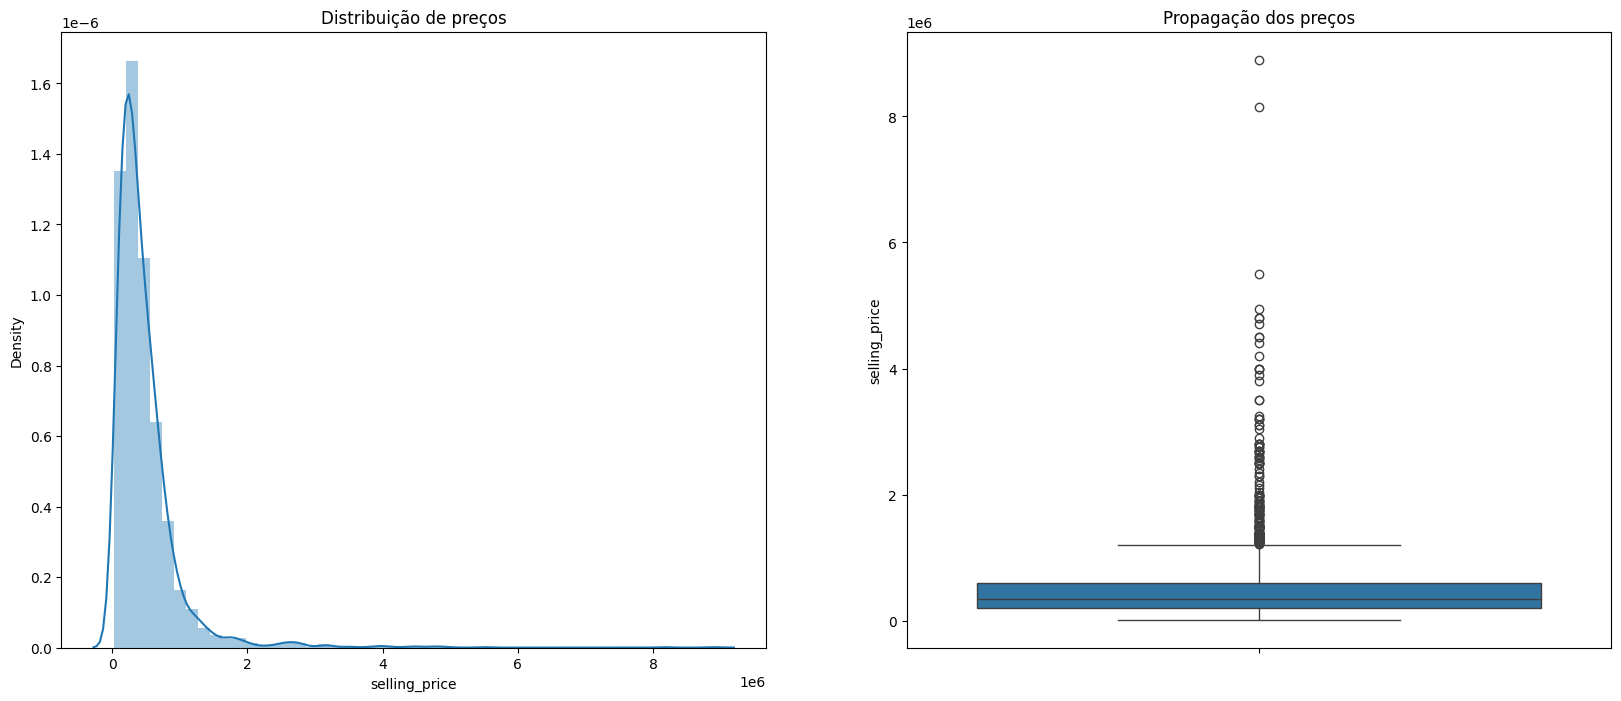

In [78]:
import seaborn as sns
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribuição de preços')
sns.distplot(data['selling_price'])

plt.subplot(1,2,2)
plt.title('Propagação dos preços')
sns.boxplot(y=data['selling_price'])


plt.show()

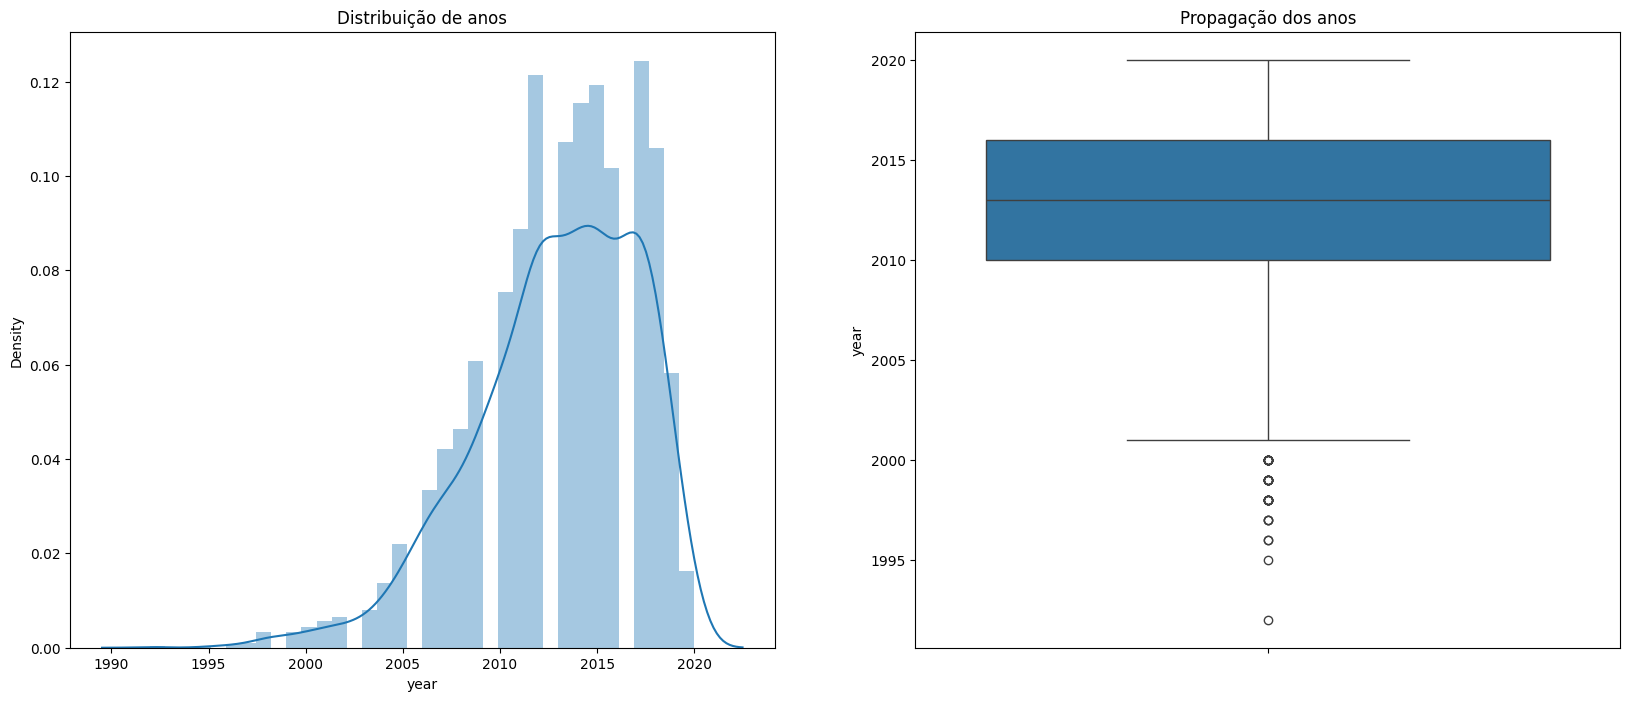

In [79]:
import seaborn as sns
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribuição de anos')
sns.distplot(data['year'])

plt.subplot(1,2,2)
plt.title('Propagação dos anos')
sns.boxplot(y=data['year'])


plt.show()

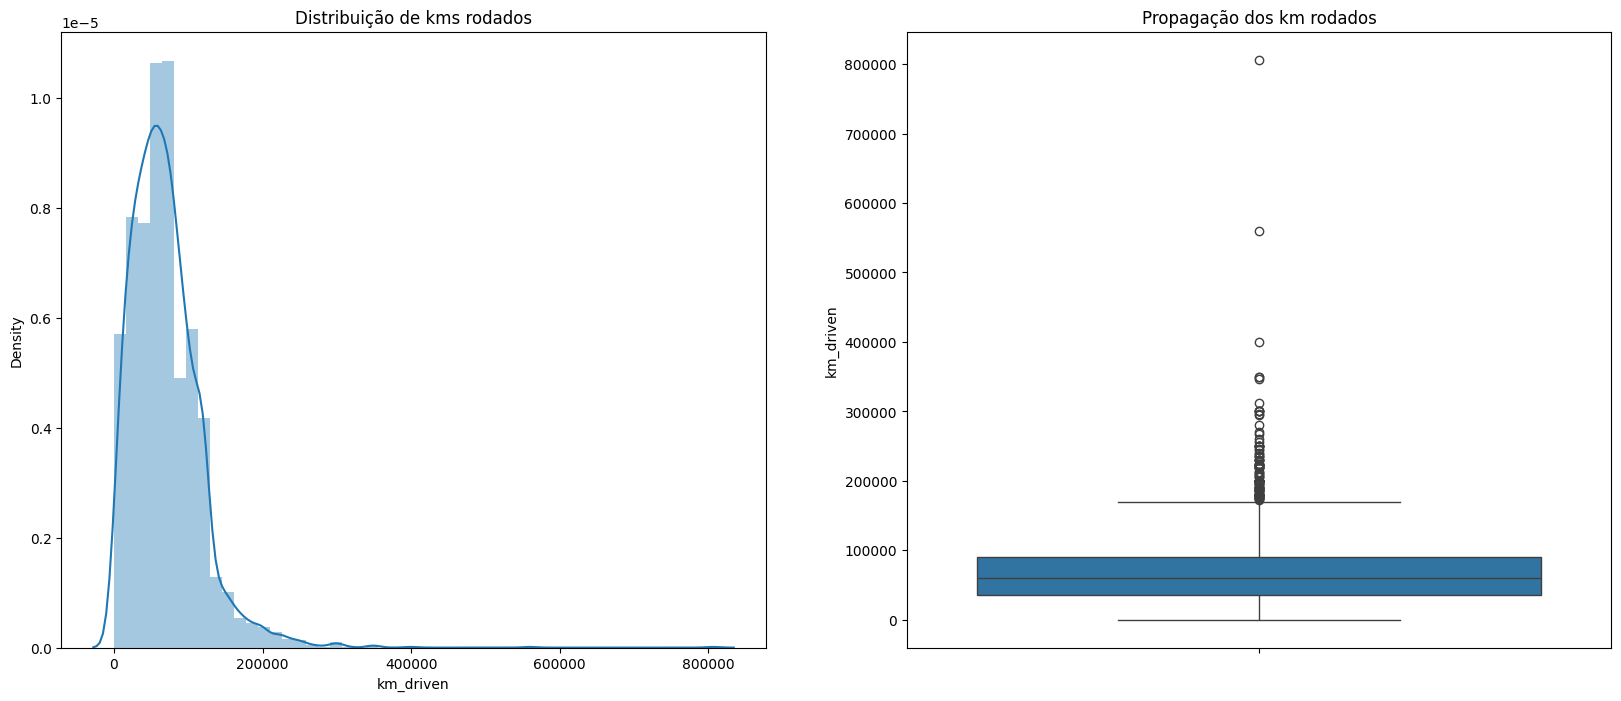

In [80]:
import seaborn as sns
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribuição de kms rodados')
sns.distplot(data['km_driven'])

plt.subplot(1,2,2)
plt.title('Propagação dos km rodados')
sns.boxplot(y=data['km_driven'])


plt.show()

Perfil de carro que mais sai: carros de 2010 a 2016, com menos de 100k km rodados, com preços não maiores que 1.3M

# Separar as características (features) e o alvo (target)

In [93]:
# Separar as características (features) e o alvo (target)
X = data[['year', 'km_driven']]  # Características
y = data['selling_price']  # Alvo

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um modelo de regressão linear
model = LinearRegression()
# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

array([ 473039.8163954 ,  646369.12073018,  130234.84330724,
        556011.1512787 ,  770943.18055178,  345778.78440133,
        616963.48959935,  381944.02485219,  803130.31576148,
        438436.17139685,  857903.26248196,  698213.22878185,
        742770.91524469,   58961.17320479,  488344.74136773,
        587854.472525  , 1061599.03995623,  531893.4711737 ,
        132984.97537418,  722488.28864519,  770943.18055178,
        873992.40480571,  589228.43373436,  907860.61646856,
        428107.21037103,  742770.91524469,  811336.21322945,
        356794.89511651,  520699.67092376,  687009.14732343,
        -47697.3403047 ,  750893.71216171,  745683.03454757,
        865396.76366068,  649903.03608612,  516564.02922937,
        933261.77521569,  606162.53956578,  162874.68657691,
        641724.16181176,  695278.21701755,  603622.42369106,
        847308.59260817,  495102.8105073 ,  502646.6541565 ,
        442792.38478547,  520324.25087124,  573200.41339446,
        840124.19314286,

# Avaliar o desempenho do modelo

In [97]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
print(f"Erro quadrático médio: {mse}")
print(f"r2 {r2}")
print(f"Erro médio absoluto {mae}")
print(f"Erro médio percentual absoluto {mape}")

Erro quadrático médio: 238316812611.40668
r2 0.21906940656281437
Erro médio absoluto 251770.47989593758
Erro médio percentual absoluto 0.7826328203056403


# Visualizar as previsões em comparação com os valores reais

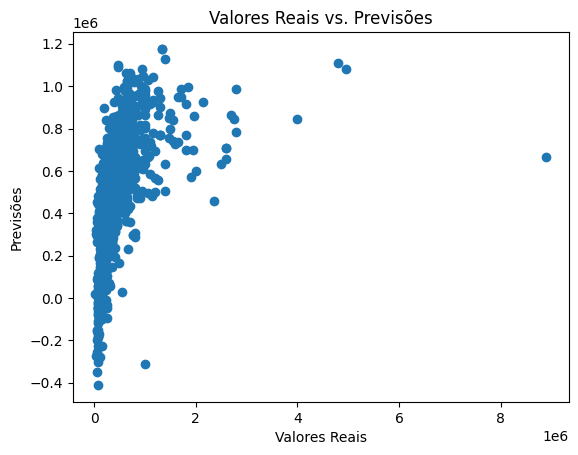

In [98]:
plt.scatter(y_test, predictions)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Valores Reais vs. Previsões")
plt.show()